In [2]:
library(Seurat)
library(linseed)
library(Matrix)
#library(rtracklayer)
#library(devtools)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3
Setting options('download.file.method.GEOquery'='auto')
Setting options('GEOquery.inmemory.gpl'=FALSE)


In [20]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("rtracklayer")

ERROR: Error: Bioconductor version '3.8' requires R version '3.5'; see
  https://bioconductor.org/install


In [3]:
getwd()


[1] "/home/mooreank/deconvolution"

In [12]:
setwd('../')
#setwd('./filtered_feature_bc_matrix_SCAF705_190320_A72/')

In [4]:
#reading 10x data to a single matrix
matrix_dir = "/home/mooreank/deconvolution/filtered_feature_bc_matrix_SCAF705_190320_A72/"
barcode.path <- paste0(matrix_dir, "barcodes.tsv.gz")
features.path <- paste0(matrix_dir, "features.tsv.gz")
matrix.path <- paste0(matrix_dir, "matrix.mtx.gz")
mat <- readMM(file = matrix.path)
feature.names = read.delim(features.path, 
                           header = FALSE,
                           stringsAsFactors = FALSE)
barcode.names = read.delim(barcode.path, 
                           header = FALSE,
                           stringsAsFactors = FALSE)
colnames(mat) = barcode.names$V1
rownames(mat) = feature.names$V1

##matrix to dataframe
nabec.df1 <- as.data.frame(mat)


#reading 10x data to a single matrix
# matrix_dir = "/home/mooreank/deconvolution/filtered_feature_bc_matrix_SCAF706_190320_A1027/"
# barcode.path <- paste0(matrix_dir, "barcodes.tsv.gz")
# features.path <- paste0(matrix_dir, "features.tsv.gz")
# matrix.path <- paste0(matrix_dir, "matrix.mtx.gz")
# mat <- readMM(file = matrix.path)
# feature.names = read.delim(features.path, 
#                            header = FALSE,
#                            stringsAsFactors = FALSE)
# barcode.names = read.delim(barcode.path, 
#                            header = FALSE,
#                            stringsAsFactors = FALSE)
# colnames(mat) = barcode.names$V1
# rownames(mat) = feature.names$V1

# ##matrix to dataframe
# nabec.df2 <- as.data.frame(mat)


In [5]:
head(nabec.df1)

ERROR while rich displaying an object: Error in sprintf(wrap, caption, header, body): 'fmt' length exceeds maximal format length 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]]

,AAACCCAAGACAACAT-1,AAACCCAAGATGAATC-1,AAACCCAAGCTGGCCT-1,AAACCCAAGGTCCCGT-1,AAACCCAAGGTTGAGC-1,AAACCCACAAATACGA-1,AAACCCACACCGGAAA-1,AAACCCACATTGACCA-1,AAACCCAGTATCGCAT-1,AAACCCAGTCCAAAGG-1,⋯,TTTGTTGGTAGGCTGA-1,TTTGTTGGTATAGGGC-1,TTTGTTGGTCGCATTA-1,TTTGTTGGTGGCTTGC-1,TTTGTTGGTTCACCGG-1,TTTGTTGTCAAGAAAC-1,TTTGTTGTCCAGTACA-1,TTTGTTGTCCTCGATC-1,TTTGTTGTCGTCGGGT-1,TTTGTTGTCTTCCACG-1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000243485,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000237613,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000186092,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000238009,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000239945,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSG00000239906,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [15]:
write.csv(nabec.df, './scnabec_df.csv')

In [7]:
sub.nabec.df <- nabec.df[c(1:5000)]

In [6]:
dim(sub.nabec.df)

[1] 33538  5000

In [8]:
nabec <- LinseedObject$new(sub.nabec.df, topGenes=10000)

In [8]:
nabec

<LinseedObject>
  Public:
    calculatePairwiseLinearity: function (negToZero = T) 
    calculateSignificanceLevel: function (iters = 1000, spearmanThreshold = 0, retVal = F) 
    calculateSpearmanCorrelation: function () 
    cellTypeNumber: NULL
    clone: function (deep = FALSE) 
    deconvolutionError: function (dataset = "filtered", error = "norm") 
    deconvolve: function (dataset = "filtered", error = "norm", method = "dsa", 
    deconvolveByEndpoints: function (dataset = "filtered", error = "norm") 
    distances: NULL
    endpoints: NULL
    endpointsProjection: NULL
    exp: list
    filterDataset: function (geneSubset) 
    filterDatasetByPval: function (pval = 0.001) 
    genes: list
    hysime: function (dataset = "filtered", error = "norm", set = FALSE) 
    initialize: function (...) 
    markers: NULL
    name: NULL
    pairwise: NULL
    project: function (dataset) 
    projection: NULL
    projectionPlot: function (dims = 1:2, color = NULL) 
    projectiveProjection:

In [ ]:
# ppmi2 <- LinseedObject$new("ppmi.v121018.transcripts.csv.gz", samples=10:42, topGenes=10000)

Sampling weights [===========================] 100% eta:  0s
Total number of genes is 10000
The number of genes after filtering is 361


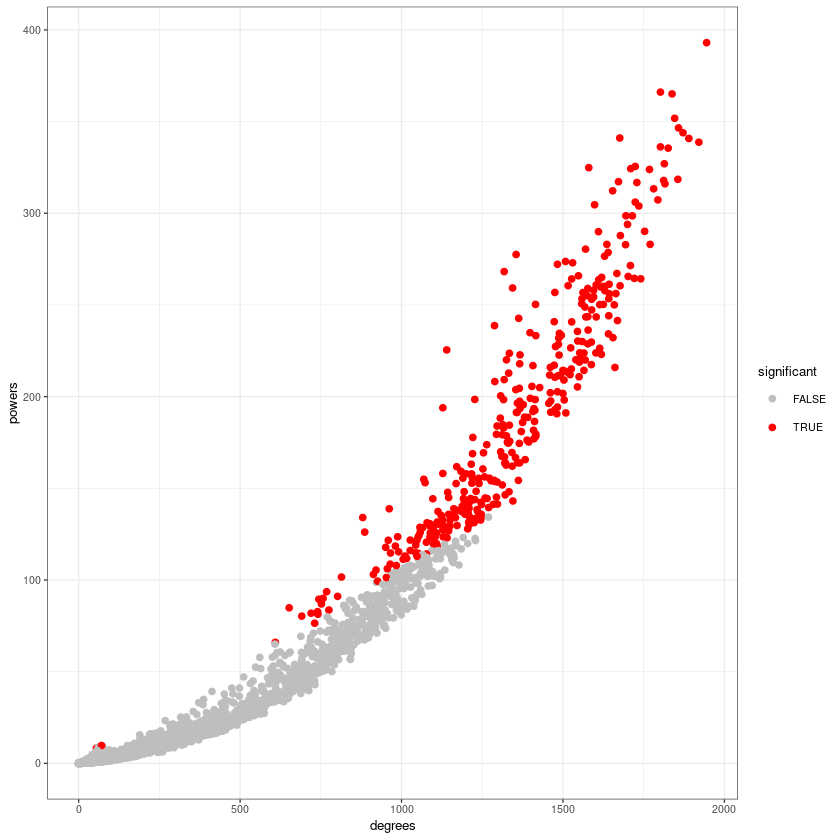

In [9]:
nabec$calculatePairwiseLinearity()
nabec$calculateSpearmanCorrelation()
nabec$calculateSignificanceLevel(100)
nabec$significancePlot(0.01)

nabec$filterDatasetByPval(0.01)

Warning message:
“Removed 5265 rows containing missing values (geom_point).”Warning message:
“Removed 5265 rows containing missing values (geom_path).”

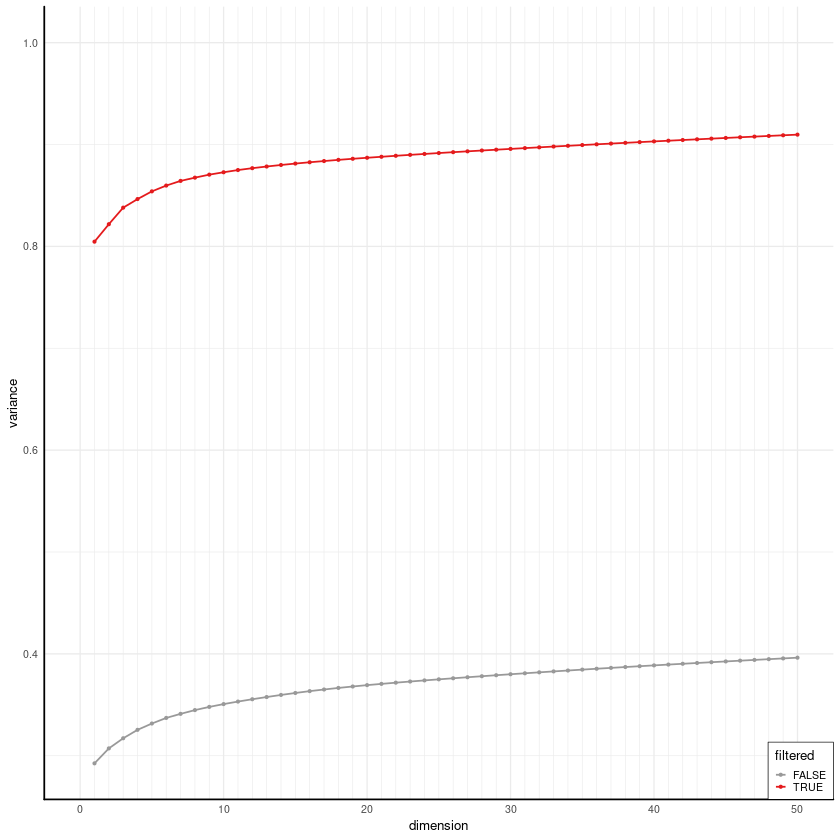

In [10]:
nabec$svdPlot()
##determine numberof cell types by #of dimension elbow occurs at

In [1]:
##visualize after filtering, projection plot
nabec$setCellTypeNumber(4)
# ppmi$project("full") # projecting full dataset
# ppmi$projectionPlot(color="filtered")

ERROR: Error in eval(expr, envir, enclos): object 'nabec' not found


In [12]:
##deconvolution
nabec$project("filtered")
nabec$smartSearchCorners(dataset="filtered", error="norm")

Final vector is 


2 3 1 14 1

Warning message:
“Removed 164 rows containing missing values (geom_point).”

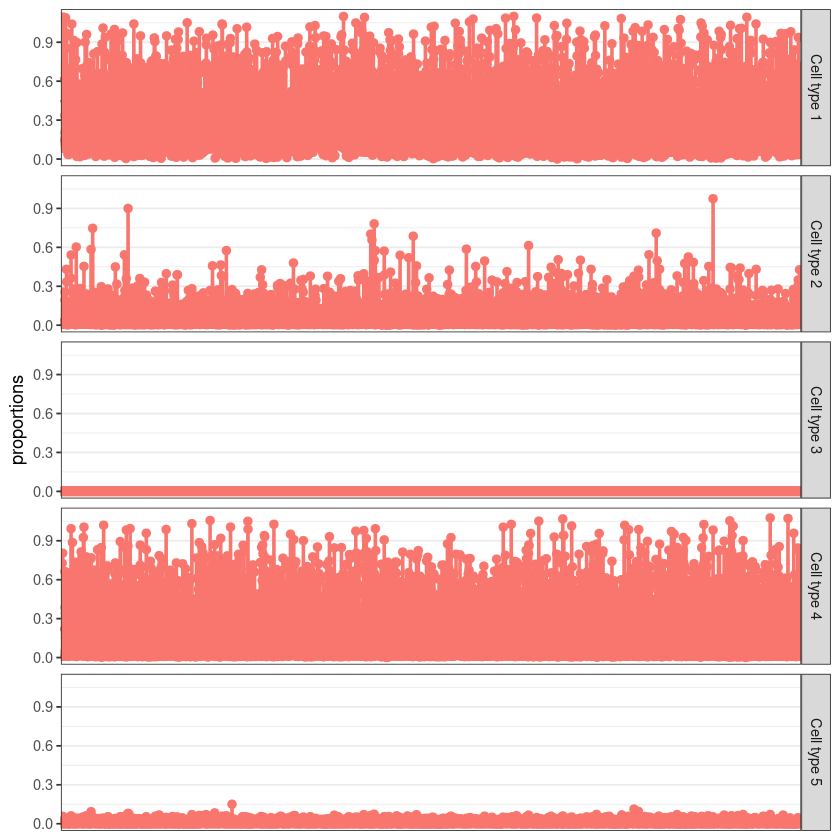

In [13]:

## 
nabec$deconvolveByEndpoints()
plotProportions(nabec$proportions)

In [14]:
head(nabec$proportions)

,AAACCCAAGACAACAT-1,AAACCCAAGATGAATC-1,AAACCCAAGCTGGCCT-1,AAACCCAAGGTCCCGT-1,AAACCCAAGGTTGAGC-1,AAACCCACAAATACGA-1,AAACCCACACCGGAAA-1,AAACCCACATTGACCA-1,AAACCCAGTATCGCAT-1,AAACCCAGTCCAAAGG-1,⋯,CATTCCGTCTGGGAGA-1,CATTCTAAGAGGTTTA-1,CATTCTAAGCGTGCTC-1,CATTCTAAGGGTTAAT-1,CATTCTAAGTGCAAAT-1,CATTCTACAAGAGTGC-1,CATTCTACAGGGAATC-1,CATTCTACATCGATGT-1,CATTCTACATCTTTCA-1,CATTCTACATGCAGGA-1
Cell type 1,0.122578559,0.20305376,0.30492022,0.7387769685,0.441621347,0.191342657,0.118314809,0.19708732,0.26798567,0.172174572,⋯,0.438479347,0.08283589,0.490923356,0.18701551,0.713749532,0.20971409,0.330112241,0.24136777,0.22310567,0.122803451
Cell type 2,0.082884099,0.05579733,0.13182623,0.0065787823,0.008905218,0.006702618,0.045964988,0.05645146,0.10154167,0.052413122,⋯,0.006670289,0.06337402,0.010382225,0.08256574,0.018612034,0.06785334,0.006351376,0.06260823,0.08117886,0.178828518
Cell type 3,0.000000000,0.00000000,0.00000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.00000000,0.00000000,0.000000000,⋯,0.000000000,0.00000000,0.000000000,0.00000000,0.000000000,0.00000000,0.000000000,0.00000000,0.00000000,0.000000000
Cell type 4,0.121128692,0.30759764,0.48273855,0.0286025486,0.015052881,0.010054580,0.189776347,0.34005705,0.72697981,0.187082183,⋯,0.010850602,0.21083208,0.017286350,0.32133491,0.023225966,0.46343848,0.013142855,0.28385736,0.60140421,0.276071198
Cell type 5,0.004332535,0.01177068,0.02808436,0.0009224599,0.001054769,0.000309873,0.008448512,0.01794823,0.02367402,0.007598476,⋯,0.001026739,0.00678519,0.001538824,0.01757576,0.002196962,0.01435901,0.001010392,0.01482874,0.01794477,0.008279403


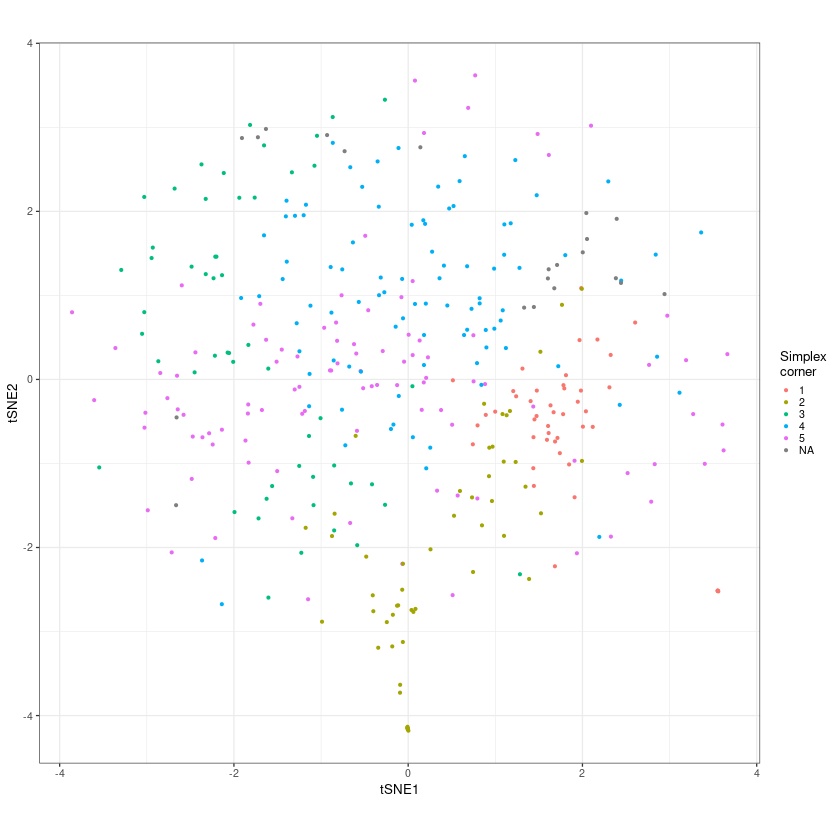

In [15]:
# lets select 100 genes closest to the simplex corners 
##tsne
nabec$selectGenes(100)
nabec$tsnePlot()

In [40]:
getwd()

[1] "/home/mooreank/linseed"

In [39]:
setwd('../../../../../')
setwd('home/mooreank/linseed')

In [16]:
getwd()

[1] "/home/mooreank/deconvolution"

In [17]:
file <- import('gencode.v32.annotation.gtf')
file_df <- as.data.frame(file)

ERROR: Error in import("gencode.v32.annotation.gtf"): could not find function "import"


In [41]:
genes <- data.frame(rosmap$selectGenes(100))
write.csv(genes, "rosmap_4cell_genes.csv")

In [73]:
head(genes)

X1,X2,X3,X4
<fct>,<fct>,<fct>,<fct>
ENST00000356264.6,ENST00000309594.4,ENST00000285518.10,ENST00000409476.5
ENST00000328257.12,ENST00000274137.9,ENST00000456936.3,ENST00000341541.7
ENST00000313683.14,ENST00000344417.9,ENST00000341285.7,ENST00000370542.1
ENST00000239940.11,ENST00000441788.6,ENST00000283131.3,ENST00000513238.5
ENST00000566012.1,ENST00000395176.2,ENST00000264710.4,ENST00000347063.8
ENST00000447467.6,ENST00000358022.4,ENST00000299957.10,ENST00000355849.9


In [43]:
genes['X1']

X1
<fct>
ENST00000356264.6
ENST00000328257.12
ENST00000313683.14
ENST00000239940.11
ENST00000566012.1
ENST00000447467.6
ENST00000562924.5
ENST00000373243.6
ENST00000435891.5


In [43]:
100genes <- read.csv('ppmi_6cell_genes.csv')


genes1 <- as.vector(genes['X1'])
#genes1_list <- genes1
genes2 <- as.vector(genes['X2'])
#genes2_list <- genes2
genes3 <- as.vector(genes['X3'])
#genes3_list <- genes3
genes4 <- as.vector(genes['X4'])
#genes4_list <- genes4
genes5 <- as.vector(genes['X5'])
#genes5_list <- genes5
genes6 <- as.vector(genes['X6'])
#genes6_list <- genes6

# genes1['gene_name'] = ''
# genes2['gene_name'] = ''
# genes3['gene_name'] = ''
# genes4['gene_name'] = ''
# genes5['gene_name'] = ''
# genes6['gene_name'] = ''

